# Prediction Of Heart Disease
### By: Rahul Kulkarni

### Scope and Problem Statement:
In this kernel we will try to predict the possibility of a person having heart diesease with the help of various factors such as age, gender,blood pressure etc. We will use various classification models for the purpose of prediction. We will got through various processes such as Data cleaning,EDA,Model fitting and Evaluation.

This prediction is very useful in the healthcare industry, as an accurate prediction can help the doctors in helping the patient beforehand.

### Description of the dataset:
1. **age**: age of the patient
2. **sex**: 1 = male and 0 = female
3. **cp(chest pain type)**: 1= typical anginaValue, 2= atypical anginaValue, 3= non-anginal painValue, 4= asymptomatic
4. **trestps(resting blood pressure)**:  resting blood pressure (in mm Hg on admission to the hospital)
5. **chol(serum cholestoral in mg/dl)**
1. **fbs(fasting blood sugar > 120 mg/dl)**: 1 = true, 0 = false
1. **restecg(resting electrocardiographic results)**: 0= normal, 1= having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2= showing probable or definite left ventricular hypertrophy by Estes' criteria
1. **thalach(maximum heart rate achieved)**
1. **exang(exercise induced angina)**: 1 = yes, 0 = no
1. **oldpeak**: ST depression induced by exercise relative to rest
1. **slope(the slope of the peak exercise ST segment)**: 1= upsloping, 2= flat, 3= downsloping
1. **ca(number of major vessels (0-3) colored by flourosopy)**
1. **thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect
1. **target**: 0= < 50% diameter narrowing, 1= > 50% diameter narrowing

# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
heart_data = pd.read_csv('../input/heart-disease-uci/heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
heart_data.shape

(303, 14)

The dataset is not very large.

Let's make sure that the data types for the features are according to the description.

In [3]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Let's check for missing values.

In [4]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no missing values.

There are certain column names that bother me so I will rename them.

In [5]:
heart_data.rename(columns={'trestbps':'restbp','thalach':'maxhr','ca':'nmv'},inplace=True)

# Exploratory Data Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Let's look at the statistical properties of the features.

In [7]:
heart_data.describe()

,age,sex,cp,restbp,chol,fbs,restecg,maxhr,exang,oldpeak,slope,nmv,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The features such as 'restbp','chol' and 'maxhr' have large ranges compared to other features. This might cause bias towards these features during modelling. We will handle this later.

Let's have a closer at the features and how they affect the target variable.

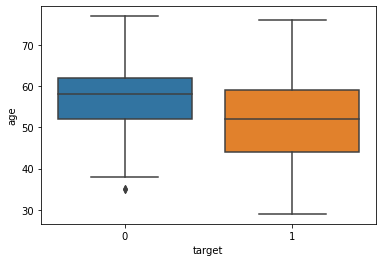

In [8]:
sns.boxplot(x='target',y='age',data=heart_data)

The box plot doesn't give us good information, so binning ages would be a better option.

In [9]:
heart_data['age']  = pd.cut(heart_data['age'],bins=[29,39,49,59,69,79],labels=[1,2,3,4,5],include_lowest=True)

In [10]:
age = heart_data.groupby(['age','target'])['target'].count().unstack()
age['per'] = round((age[1]/(age[0]+age[1]))*100,2)
age

target,0,1,per
age,,,
1,4,12,75.00
2,22,50,69.44
3,60,65,52.00
4,48,32,40.00
5,4,6,60.00


According to the data mid age patients have a higher chance of having heart problems.

In [11]:
sex = heart_data.groupby(['sex','target'])['target'].count().unstack()
sex['per'] = round((sex[1]/(sex[0]+sex[1]))*100,2)
sex

target,0,1,per
sex,,,
0,24,72,75.00
1,114,93,44.93


Females have a higher chance of having heart problems.

Let's do further analysis by grouping data by age and sex.

In [12]:
age_sex = heart_data.groupby(['age','sex','target'])['target'].count().unstack()
age_sex['per'] = round((age_sex[1]/(age_sex[0]+age_sex[1]))*100,2)
age_sex

target    0   1     per
age sex                
1   0     0   5  100.00
    1     4   7   63.64
2   0     1  18   94.74
    1    21  32   60.38
3   0    10  24   70.59
    1    50  41   45.05
4   0    13  20   60.61
    1    35  12   25.53
5   0     0   5  100.00
    1     4   1   20.00

We can club age and sex for further analysis, as this has given us interesting information.

In [13]:
cp = heart_data.groupby(['cp','target'])['target'].count().unstack()
cp['per'] = round((cp[1]/(cp[0]+cp[1]))*100,2)
cp

target,0,1,per
cp,,,
0,104,39,27.27
1,9,41,82.00
2,18,69,79.31
3,7,16,69.57


As expected, if a person has chest pain, they have a higher chance of heart problems.

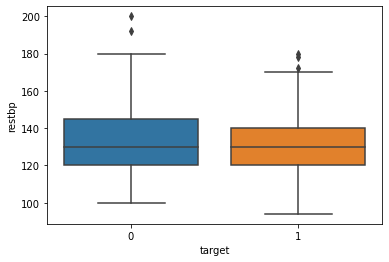

In [14]:
sns.boxplot(x='target',y='restbp',data=heart_data)

Both the target classes have the same median. The IQR of '0' label is larger than '1'. There are some outliers, such as restbp of 200. This blood pressure would mean abnormal heart behaviour. 

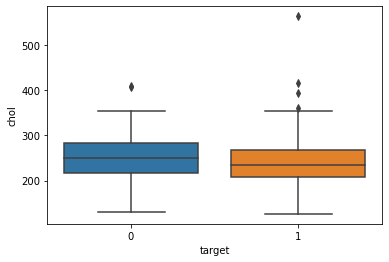

In [15]:
sns.boxplot(x='target',y='chol',data=heart_data)

Both the labels have same ranges. As expected very high cholestrol would result in heart disease, this is visible from the outliers.

In [16]:
fbs = heart_data.groupby(['fbs','target'])['target'].count().unstack()
fbs['per'] = round((fbs[1]/(fbs[0]+fbs[1]))*100,2)
fbs

target,0,1,per
fbs,,,
0,116,142,55.04
1,22,23,51.11


Nothing conclusive can be obtained from fasting blood sugar.

In [17]:
restecg = heart_data.groupby(['restecg','target'])['target'].count().unstack()
restecg['per'] = round((restecg[1]/(restecg[0]+restecg[1]))*100,2)
restecg

target,0,1,per
restecg,,,
0,79,68,46.26
1,56,96,63.16
2,3,1,25.00


The ecg result of 1 has a higher chance of heart disease.

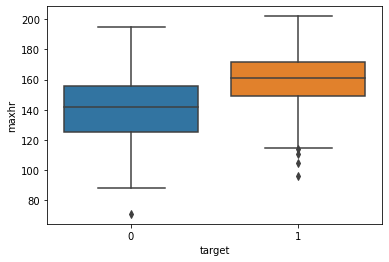

In [18]:
sns.boxplot(x='target',y='maxhr',data=heart_data)

As expected higher heart rate results in higher chance of heart disease. 

In [19]:
ex = heart_data.groupby(['exang','target'])['target'].count().unstack()
ex['per'] = round((ex[1]/(ex[0]+ex[1]))*100,2)
ex

target,0,1,per
exang,,,
0,62,142,69.61
1,76,23,23.23


It is surprising to see that no angina results in higher chance of heart disease and angina results in less chance of heart disease.

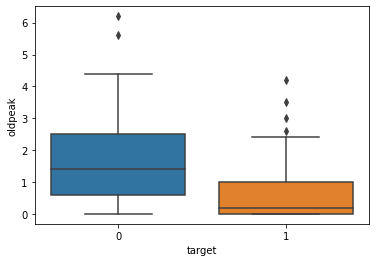

In [20]:
sns.boxplot(x='target',y='oldpeak',data=heart_data)

Very low depression results in higher chance of heart disease. A higher ST depression is seen in normal patients.

In [21]:
sl = heart_data.groupby(['slope','target'])['target'].count().unstack()
sl['per'] = round((sl[1]/(sl[0]+sl[1]))*100,2)
sl

target,0,1,per
slope,,,
0,12,9,42.86
1,91,49,35.00
2,35,107,75.35


A flat slope results in less chance of heart disease and down slope has a higher chance of disease.

In [22]:
nmv = heart_data.groupby(['nmv','target'])['target'].count().unstack()
nmv['per'] = round((nmv[1]/(nmv[0]+nmv[1]))*100,2)
nmv

target,0,1,per
nmv,,,
0,45,130,74.29
1,44,21,32.31
2,31,7,18.42
3,17,3,15.00
4,1,4,80.00


very low and very high vessels results in heart disease. But mid range vessels have a lower chance of disease.

In [23]:
thal = heart_data.groupby(['thal','target'])['target'].count().unstack()
thal['per'] = round((thal[1]/(thal[0]+thal[1]))*100,2)
thal

target,0,1,per
thal,,,
0,1,1,50.00
1,12,6,33.33
2,36,130,78.31
3,89,28,23.93


As expected irreversible defects have a higher chance of disease and reversible defects have a lower chance.

Let's create a new variable using age and sex.

In [24]:
heart_data['age']=heart_data['age'].astype('int')
heart_data['age_sex'] = heart_data['age']*heart_data['sex']

Let's check the correlation between features.

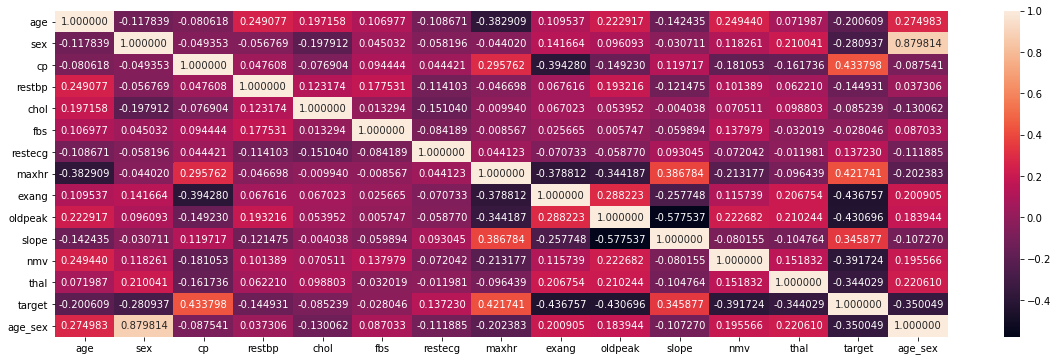

In [25]:
c = heart_data.corr()
plt.figure(figsize=(20,6))
sns.heatmap(c,annot=True,fmt='f')

We can observe 'cp' and 'maxhr' have a decent positive correlation with our target variables. Features such as 'exang','oldpeak','nmv','thal' and 'age_sex' have a negative correlation.

# Model Fitting

Here we will select the features we will use for prediction. We will select features which have a decent correlation with our target variable. Also we will make use of MinMaxScaler to reduce the range of 'restbp' and 'maxhr' to avoid bias towards them. We make use of training set to find the optimum parameters for our models and make use of KFold to check the performance of our model. The metric which we will use for evaluation will be F1 score. Since we need to reduce the false negatives, F1 score is a better metric than accuracy score. The reason being F1 score includes both precision and recall.

In [26]:
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score as fs
from statistics import mean
from sklearn.preprocessing import MinMaxScaler as MMS
heart_data['mms_restbp'] = MMS().fit_transform(heart_data[['restbp']])
heart_data['mms_maxhr'] = MMS().fit_transform(heart_data[['maxhr']])
x = heart_data[['age_sex','cp','mms_restbp','restecg','mms_maxhr','exang','oldpeak','slope','nmv','thal']]
y = heart_data['target']
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.2,random_state=100)
kf = KFold(n_splits=5,shuffle=True,random_state=100)

### K Nearest Neighbors

We need to find the optimum number of neighbors for our model. Hence we will compare the F1 scores obtained for various values for our neighbors.

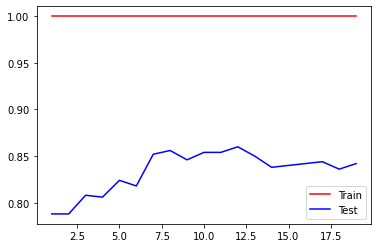

In [27]:
from sklearn.neighbors import KNeighborsClassifier as KNC
neighbors,scores_train,scores_test = [i for i in range(1,20)],[],[]
for n in neighbors:
    score_train,score_test = [],[]
    for train,test in kf.split(xtrain):
        xtr,xtt = xtrain.iloc[train],xtrain.iloc[test]
        ytr,ytt = ytrain.iloc[train],ytrain.iloc[test]
        knc = KNC(n_neighbors=n,weights='distance') #Giving weight to the distance of neighbors
        knc.fit(xtr,ytr)
        yhat_train = knc.predict(xtr)
        yhat_test = knc.predict(xtt)
        score_train.append(round(fs(ytr,yhat_train),2))
        score_test.append(round(fs(ytt,yhat_test),2))
    scores_train.append(mean(score_train))
    scores_test.append(mean(score_test))
sns.lineplot(x=neighbors,y=scores_train,color='r')
sns.lineplot(x=neighbors,y=scores_test,color='b')
plt.legend(('Train','Test'))

The value of optimum neighbors is 8.

### Decision Tree

We need to find the optimum depth for our model.

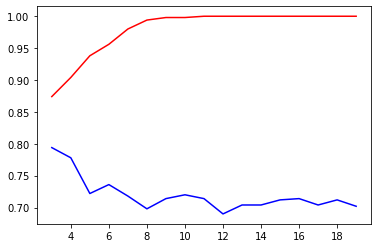

In [28]:
from sklearn.tree import DecisionTreeClassifier as DTC
depths,scores_train,scores_test = [i for i in range(3,20)],[],[]
for d in depths:
    score_train,score_test = [],[]
    for train,test in kf.split(xtrain):
        xtr,xtt = xtrain.iloc[train],xtrain.iloc[test]
        ytr,ytt = ytrain.iloc[train],ytrain.iloc[test]
        dtc = DTC(max_depth=d)
        dtc.fit(xtr,ytr)
        yhat_train = dtc.predict(xtr)
        yhat_test = dtc.predict(xtt)
        score_train.append(round(fs(ytr,yhat_train),2))
        score_test.append(round(fs(ytt,yhat_test),2))
    scores_train.append(mean(score_train))
    scores_test.append(mean(score_test))
sns.lineplot(x=depths,y=scores_train,color='r')
sns.lineplot(x=depths,y=scores_test,color='b')

Depth value of 3 has the highest F1 score but I am certain that this value would underfit the data. Therefore I believe choosing a value of 6 would be better.

### Logistic Regression

We need to find the optimum value of regularization factor for our model. Increasing the regularization strength penalizes "large" weight coefficients. Our goal is to prevent that our model picks up "peculiarities," "noise," or "imagines a pattern where there is none."

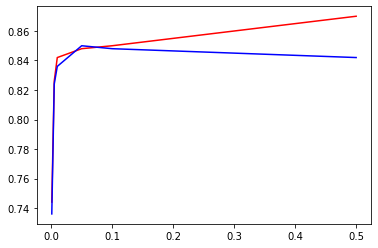

In [29]:
from sklearn.linear_model import LogisticRegression as LR
C,scores_train,scores_test = [0.001,0.005,0.01,0.05,0.1,0.5],[],[]
for c in C:
    score_train,score_test = [],[]
    for train,test in kf.split(xtrain):
        xtr,xtt = xtrain.iloc[train],xtrain.iloc[test]
        ytr,ytt = ytrain.iloc[train],ytrain.iloc[test]
        lr = LR(C=c,max_iter=1000)  # C is Inverse of regularization strength
        lr.fit(xtr,ytr)
        yhat_train = lr.predict(xtr)
        yhat_test = lr.predict(xtt)
        score_train.append(round(fs(ytr,yhat_train),2))
        score_test.append(round(fs(ytt,yhat_test),2))
    scores_train.append(mean(score_train))
    scores_test.append(mean(score_test))
sns.lineplot(x=C,y=scores_train,color='r')
sns.lineplot(x=C,y=scores_test,color='b')

The optimum regularization factor was found to be 0.05.

### Gaussian Naive Bayes

This a model where it assumes data to be normally distributed and applies bayes theorem assumptions. There are no parameters to be adjusted in this model.

In [30]:
from sklearn.naive_bayes import GaussianNB as GNB
score_train,score_test = [],[]
for train,test in kf.split(xtrain):
    xtr,xtt = xtrain.iloc[train],xtrain.iloc[test]
    ytr,ytt = ytrain.iloc[train],ytrain.iloc[test]
    gnb = GNB()
    gnb.fit(xtr,ytr)
    yhat_train = gnb.predict(xtr)
    yhat_test = gnb.predict(xtt)
    score_train.append(round(fs(ytr,yhat_train),2))
    score_test.append(round(fs(ytt,yhat_test),2))
print(mean(score_train),mean(score_test))

0.854 0.83


### Support Vector Machine

Similar to the logistic regression model, we will try to find the optimum value for the regularization factor.

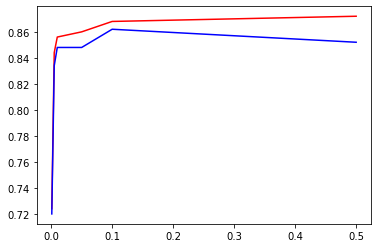

In [31]:
from sklearn.svm import SVC
C,scores_train,scores_test = [0.001,0.005,0.01,0.05,0.1,0.5],[],[]
for c in C:
    score_train,score_test = [],[]
    for train,test in kf.split(xtrain):
        xtr,xtt = xtrain.iloc[train],xtrain.iloc[test]
        ytr,ytt = ytrain.iloc[train],ytrain.iloc[test]
        svc = SVC(C=c,kernel='linear')
        svc.fit(xtr,ytr)
        yhat_train = svc.predict(xtr)
        yhat_test = svc.predict(xtt)
        score_train.append(round(fs(ytr,yhat_train),2))
        score_test.append(round(fs(ytt,yhat_test),2))
    scores_train.append(mean(score_train))
    scores_test.append(mean(score_test))
sns.lineplot(x=C,y=scores_train,color='r')
sns.lineplot(x=C,y=scores_test,color='b')

The optimum value is 0.1

### Random Forest Classifier

This model creates various trees and finds the average of all the trees. We will need to find the optimum number of trees to be considered for this model. We will use the maximum depth which we found from the DTC model.

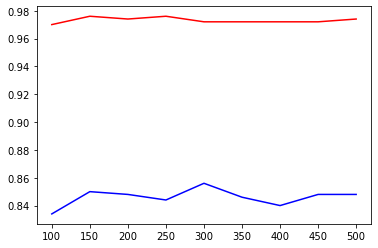

In [32]:
from sklearn.ensemble import RandomForestClassifier as RFC
estimators,scores_train,scores_test = [100,150,200,250,300,350,400,450,500],[],[]
for e in estimators:
    score_train,score_test = [],[]
    for train,test in kf.split(xtrain):
        xtr,xtt = xtrain.iloc[train],xtrain.iloc[test]
        ytr,ytt = ytrain.iloc[train],ytrain.iloc[test]
        rfc = RFC(n_estimators=e,max_depth=6)
        rfc.fit(xtr,ytr)
        yhat_train = rfc.predict(xtr)
        yhat_test = rfc.predict(xtt)
        score_train.append(round(fs(ytr,yhat_train),2))
        score_test.append(round(fs(ytt,yhat_test),2))
    scores_train.append(mean(score_train))
    scores_test.append(mean(score_test))
sns.lineplot(x=estimators,y=scores_train,color='r')
sns.lineplot(x=estimators,y=scores_test,color='b')

The optimum number of trees was found to be 250.

# Evaluation

Now we will test our models on the test data and see the performance with the help of confusion matrix.

In [33]:
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix
models,f1score,acscore = ['KNN','DTC','LR','GNB','SVM','RFC'],[],[]

### K Nearest Neighbors

In [34]:
knn = KNC(n_neighbors=8,weights='distance')
knn.fit(xtrain,ytrain)
yhat_eval = knn.predict(xtest)
f1 = round(fs(ytest,yhat_eval),2)
ac = round(acs(ytest,yhat_eval),2)
f1score.append(f1)
acscore.append(ac)
print(f1,ac)

0.84 0.84


Text(33.0, 0.5, 'True Label')

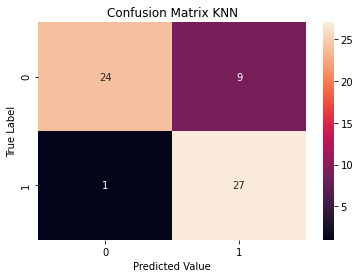

In [35]:
cfm = confusion_matrix(ytest,yhat_eval)
sns.heatmap(cfm,annot=True)
plt.title('Confusion Matrix KNN')
plt.xlabel('Predicted Value')
plt.ylabel('True Label')

### Decision Tree Classifier

In [36]:
dtc = DTC(max_depth=6)
dtc.fit(xtrain,ytrain)
yhat_eval = dtc.predict(xtest)
f1 = round(fs(ytest,yhat_eval),2)
ac = round(acs(ytest,yhat_eval),2)
f1score.append(f1)
acscore.append(ac)
print(f1,ac)

0.84 0.84


Text(33.0, 0.5, 'True Label')

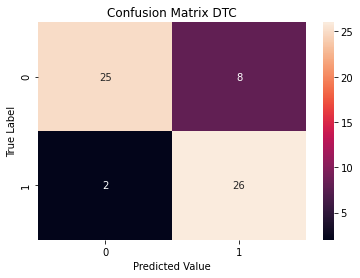

In [37]:
cfm = confusion_matrix(ytest,yhat_eval)
sns.heatmap(cfm,annot=True)
plt.title('Confusion Matrix DTC')
plt.xlabel('Predicted Value')
plt.ylabel('True Label')

### Logistic Regression

In [38]:
lr = LR(C=0.05)
lr.fit(xtrain,ytrain)
yhat_eval = lr.predict(xtest)
f1 = round(fs(ytest,yhat_eval),2)
ac = round(acs(ytest,yhat_eval),2)
f1score.append(f1)
acscore.append(ac)
print(f1,ac)

0.89 0.89


Text(33.0, 0.5, 'True Label')

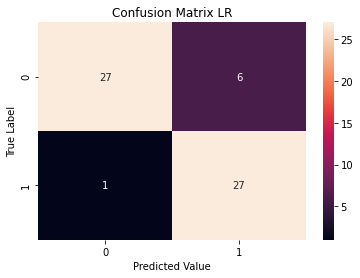

In [39]:
cfm = confusion_matrix(ytest,yhat_eval)
sns.heatmap(cfm,annot=True)
plt.title('Confusion Matrix LR')
plt.xlabel('Predicted Value')
plt.ylabel('True Label')

### Gaussian Naive Bayes

In [40]:
gnb = GNB()
gnb.fit(xtrain,ytrain)
yhat_eval = gnb.predict(xtest)
f1 = round(fs(ytest,yhat_eval),2)
ac = round(acs(ytest,yhat_eval),2)
f1score.append(f1)
acscore.append(ac)
print(f1,ac)

0.86 0.87


Text(33.0, 0.5, 'True Label')

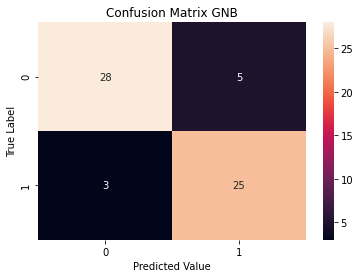

In [41]:
cfm = confusion_matrix(ytest,yhat_eval)
sns.heatmap(cfm,annot=True)
plt.title('Confusion Matrix GNB')
plt.xlabel('Predicted Value')
plt.ylabel('True Label')

### Support Vector Machine

In [42]:
svc = SVC(kernel='linear',C=0.1)
svc.fit(xtrain,ytrain)
yhat_eval = svc.predict(xtest)
f1 = round(fs(ytest,yhat_eval),2)
ac = round(acs(ytest,yhat_eval),2)
f1score.append(f1)
acscore.append(ac)
print(f1,ac)

0.87 0.87


Text(33.0, 0.5, 'True Label')

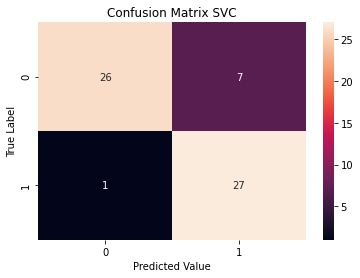

In [43]:
cfm = confusion_matrix(ytest,yhat_eval)
sns.heatmap(cfm,annot=True)
plt.title('Confusion Matrix SVC')
plt.xlabel('Predicted Value')
plt.ylabel('True Label')

### Random Forest Classifier

In [44]:
rfc = RFC(n_estimators=250,max_depth=6)
rfc.fit(xtrain,ytrain)
yhat_eval = rfc.predict(xtest)
f1 = round(fs(ytest,yhat_eval),2)
ac = round(acs(ytest,yhat_eval),2)
f1score.append(f1)
acscore.append(ac)
print(f1,ac)

0.85 0.85


Text(33.0, 0.5, 'True Label')

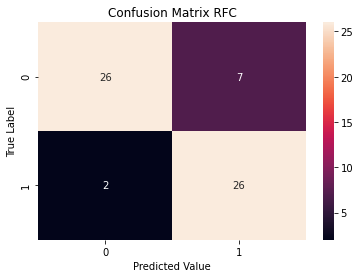

In [45]:
cfm = confusion_matrix(ytest,yhat_eval)
sns.heatmap(cfm,annot=True)
plt.title('Confusion Matrix RFC')
plt.xlabel('Predicted Value')
plt.ylabel('True Label')

We will analyse the metrics for various models and select the best one.

In [46]:
Results = pd.DataFrame({'F1 Score':f1score,'Accuracy Score':acscore},index=models)
Results.sort_values(by=['F1 Score','Accuracy Score'],ascending=False)

,F1 Score,Accuracy Score
LR,0.89,0.89
SVM,0.87,0.87
GNB,0.86,0.87
RFC,0.85,0.85
KNN,0.84,0.84
DTC,0.84,0.84


Therefore from the above table it is clear that Logistic Regression was the best model as it generated the highest F1 and Accuracy score.